# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in IronHack's database.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [1]:
# import libraries here
import pandas as pd
import numpy as np

# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [2]:
# your code here
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`.

In [3]:
# your code here
temp.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [4]:
# your code here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

"""
your comments here
"""
City and State are strings, temperature is a float.

#### Select the rows where state is New York.

In [5]:
# your code here
new_york = temp[temp['State'] == 'New York']
new_york.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average temperature of cities in New York?

In [6]:
# your code here
new_york.agg('mean')

Temperature    10.740741
dtype: float64

#### Which states and cities have a temperature above 15 degrees Celsius?

In [7]:
# your code here
temp[temp['Temperature'] > 15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [8]:
# your code here
temp.loc[temp['Temperature'] > 15, ['City', 'Temperature']]

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [9]:
# your code here
temp_15_20 = temp[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]
temp_15_20.head()

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and standard deviation of the temperature of each state.

In [10]:
# your code here
temp.groupby('State').describe()

Temperature                                                        \
                  count       mean       std        min        25%        50%   
State                                                                           
Connecticut         2.0  15.833333  1.964186  14.444444  15.138889  15.833333   
New Jersey          2.0  21.111111  1.571348  20.000000  20.555556  21.111111   
New York            3.0  10.740741  8.133404   3.333333   6.388889   9.444444   

                                   
                   75%        max  
State                              
Connecticut  16.527778  17.222222  
New Jersey   21.666667  22.222222  
New York     14.444444  19.444444

# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [11]:
# your code here
employees = pd.read_csv('Employee.csv')
employees.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Explore the data types of the `employees` dataframe. Comment your results.

In [12]:
# your code here
employees.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

# """
your comments here
"""

All are strings except year and salary which are integers.

#### What's the average salary in this company?

In [13]:
# your code here
employees['Salary'].agg('mean')

48.888888888888886

#### What's the highest salary?

In [14]:
# your code here
employees['Salary'].max()

70

#### What's the lowest salary?

In [15]:
# your code here
employees['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [16]:
# your code here
employees.loc[employees['Salary'] == employees['Salary'].min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find all the information about an employee called David.

In [17]:
# your code here
employees.loc[employees['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you return only David's salary?

In [18]:
# your code here
employees['Salary'].loc[employees['Name'] == 'David']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate.

In [19]:
# your code here
employees.loc[employees.Title == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [20]:
# Method 1
# your code here
employees.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [21]:
# Method 2
# your code here
employees[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees whose title is associate and whose salary is above 55.

In [22]:
# your code here
employees.loc[(employees.Title == 'associate') & (employees.Salary > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees by number of years of employment. What are the average salaries in each group?

In [23]:
# your code here
employees.groupby(['Years'])['Salary'].mean()

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average salary per title?

In [24]:
# your code here
employees.groupby(['Title'])['Salary'].mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

####  Find the salary quartiles.


In [25]:
# your code here
employees['Salary'].quantile((0,0.25,0.50,0.75,1))

0.00    30.0
0.25    35.0
0.50    55.0
0.75    60.0
1.00    70.0
Name: Salary, dtype: float64

#### Is the mean salary different per gender?

In [26]:
# your code here
employees.groupby(['Gender'])['Salary'].mean()[0] == employees.groupby(['Gender'])['Salary'].mean()[1]

False

#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [27]:
# your code here
employees[['Years', 'Salary']].agg(['mean', 'max', 'min'])

,Years,Salary
mean,4.111111,48.888889
max,8.000000,70.000000
min,1.000000,30.000000


#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [28]:
# your code here

dep_salary = employees.groupby(['Department'])['Salary'].agg(['max','min'])
dep_salary['Difference'] = dep_salary['max'] - dep_salary['min']
dep_salary

,max,min,Difference
Department,,,
HR,70,30,40
IT,70,30,40
Sales,55,55,0


# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [29]:
# your code here
orders = pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [30]:
# your code here

orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [31]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

####  What is the average purchase price?

In [32]:
# your code here
orders['Quantity'].mean() * orders['UnitPrice'].mean()

40.5782733415517

#### What are the highest and lowest purchase prices? 

In [33]:
# your code here

#USING QUANTITY AND UNIT PRICE
min = orders['Quantity'].min() * orders['UnitPrice'].min()
max = orders['Quantity'].max() * orders['UnitPrice'].max()
print(min)
print(max)

0.0
659522036.25


In [47]:
# USING AMOUNT SPENT

min = orders['amount_spent'].min()
max = orders['amount_spent'].max()
print(min)
print(max)

0.0
168469.6


#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [34]:
# your code here
spain_cus = orders.loc[orders['Country'] == 'Spain']['CustomerID'].drop_duplicates()
spain_cus.head()

4250     12557
13974    17097
17368    12540
23288    12551
29804    12484
Name: CustomerID, dtype: int64

#### How many customers do we have in Spain?

In [35]:
# your code here
len(spain_cus)

30

#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [62]:
# your code here
x = orders.groupby(['CustomerID']).agg({'Quantity' : 'sum'})
x[x['Quantity'] > 50].sort_values('Quantity')

,Quantity
CustomerID,
14890,51
15748,51
12587,51
15350,51
15945,52
14768,52
15168,52
15612,52
16363,52


#### Select orders from Spain that include more than 50 items.

In [64]:
# your code here
orders[(orders['Country'] == 'Spain') & (orders['Quantity'] > 50)]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders.

In [38]:
# your code here
free = orders[orders['amount_spent'] == 0]
free.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [39]:
# your code here
lunch_bag = orders[orders['Description'].str.startswith('lunch bag')]
lunch_bag.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all `lunch bag` orders made in 2011.

In [40]:
# your code here
lunch_bag[lunch_bag['year'] == 2011]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26861,43617,540098,22383,2011,1,2,15,lunch bag suki design,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26862,43618,540098,22382,2011,1,2,15,lunch bag spaceboy design,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26863,43619,540098,20727,2011,1,2,15,lunch bag black skull.,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26864,43620,540098,20727,2011,1,2,15,lunch bag black skull.,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26902,43658,540099,20725,2011,1,2,16,lunch bag red retrospot,10,2011-01-04 16:41:00,1.65,15808,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

(array([2.428e+03, 3.900e+01, 9.000e+00, 3.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 5.000e+00]),
 array([   0.,  135.,  270.,  405.,  540.,  675.,  810.,  945., 1080.,
        1215., 1350.]),
 <a list of 10 Patch objects>)

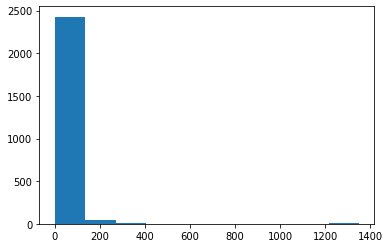

In [70]:
# your code here
import matplotlib
import matplotlib.pyplot as plt

spain_spends = orders[orders['Country'] == 'Spain']['amount_spent']
plt.hist(spain_spends)

#### Select all orders made in the month of August.

In [42]:
# your code here
orders[orders['month'] == 8]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
199480,285426,561905,84978,2011,8,1,9,hanging heart jar t-light holder,12,2011-08-01 09:31:00,1.25,14947,United Kingdom,15.00
199481,285427,561905,21754,2011,8,1,9,home building block word,3,2011-08-01 09:31:00,5.95,14947,United Kingdom,17.85
199482,285428,561905,23226,2011,8,1,9,filigree heart daisy white,24,2011-08-01 09:31:00,1.25,14947,United Kingdom,30.00
199483,285429,561905,21715,2011,8,1,9,girls vintage tin seaside bucket,8,2011-08-01 09:31:00,2.55,14947,United Kingdom,20.40
199484,285430,561905,21716,2011,8,1,9,boys vintage tin seaside bucket,8,2011-08-01 09:31:00,2.55,14947,United Kingdom,20.40


#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [43]:
# your code here
orders[orders['month'] == 8]['Country'].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country?

In [44]:
# your code here
orders.groupby(['Country'])['amount_spent'].agg('mean')

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [45]:
# your code here
orders.loc[orders['UnitPrice'] == orders['UnitPrice'].max()]['Description']

118352    postage
Name: Description, dtype: object

#### What is the average amount spent per year?

In [46]:
# your code here
orders.groupby(['year'])['amount_spent'].agg('mean')

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64